<h1>EDA for Hotels Data

In [61]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [62]:
hotels_data_v2=pd.read_csv("cleaned_hotel_booking.csv")

In [63]:
hotels_data_v2.shape

(119366, 30)

In [64]:
hotels_data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119366 entries, 0 to 119365
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      119366 non-null  int64  
 1   hotel                           119366 non-null  object 
 2   is_canceled                     119366 non-null  int64  
 3   lead_time                       119366 non-null  int64  
 4   arrival_date_week_number        119366 non-null  int64  
 5   stays_in_weekend_nights         119366 non-null  int64  
 6   stays_in_week_nights            119366 non-null  int64  
 7   adults                          119366 non-null  int64  
 8   children                        119366 non-null  float64
 9   babies                          119366 non-null  int64  
 10  meal                            119366 non-null  object 
 11  country                         119366 non-null  object 
 12  market_segment  

In [65]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [66]:
hotels_data_v2.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date
0,40060,City Hotel,0,6,27,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,0,Transient,0.0,0,0,Check-Out,2015-07-03,2015-07-01
1,40061,City Hotel,1,88,27,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,76.5,0,1,Canceled,2015-07-01,2015-07-01
2,40062,City Hotel,1,65,27,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,68.0,0,1,Canceled,2015-04-30,2015-07-01
3,40063,City Hotel,1,92,27,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,76.5,0,2,Canceled,2015-06-23,2015-07-01
4,40064,City Hotel,1,100,27,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0,Transient,76.5,0,1,Canceled,2015-04-02,2015-07-02


In [67]:
hotels_data_v2['Date']=pd.to_datetime(hotels_data_v2['Date'])
hotels_data_v2['reservation_status_date']=pd.to_datetime(hotels_data_v2['reservation_status_date'])

In [68]:
# Just double checking if there are any null values

hotels_data_v2.isnull().sum()

Unnamed: 0                        0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

<h3> I think there is no use of arrival date week number. So I am dropping the whole column and I am separating the date column to month, week and Year

In [69]:
hotels_data_v2.drop('arrival_date_week_number',axis=1,inplace=True)

In [70]:
len(hotels_data_v2['Unnamed: 0'].unique())
hotels_data_v2.shape

(119366, 29)

<h4> Sice Un named column is also just the unique Id. We can remove it as well.

In [71]:
hotels_data_v2.drop('Unnamed: 0',axis=1,inplace=True)

In [72]:
hotels_data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119366 entries, 0 to 119365
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119366 non-null  object        
 1   is_canceled                     119366 non-null  int64         
 2   lead_time                       119366 non-null  int64         
 3   stays_in_weekend_nights         119366 non-null  int64         
 4   stays_in_week_nights            119366 non-null  int64         
 5   adults                          119366 non-null  int64         
 6   children                        119366 non-null  float64       
 7   babies                          119366 non-null  int64         
 8   meal                            119366 non-null  object        
 9   country                         119366 non-null  object        
 10  market_segment                  119366 non-null  object 

<h3>I am checking if all the values in the column are values corresponding to that column or not. The above columns of meals are all Numeric so I
don't think there is any issue is that. But in Categorical columns the values can be mistyped or put different names. So I checking them

In [73]:
hotels_data_v2['meal'].value_counts()
print('------------------------------------------------')

hotels_data_v2['deposit_type'].value_counts()

------------------------------------------------


deposit_type
No Deposit    104631
Non Refund     14573
Refundable       162
Name: count, dtype: int64

In [74]:
# Separating Categorical columns with rest of the columns

categorical_columns=[]
numerical_columns=[]
date_columns=[]

for col in hotels_data_v2.columns:
    if hotels_data_v2[col].dtype=='O':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

In [75]:
categorical_columns

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [76]:
## Now I will run all the categorical columns in a loop and see what values does each column consist of

for col in categorical_columns:
   print(hotels_data_v2[col].value_counts())
   print('------------------------------------------')

hotel
City Hotel      79306
Resort Hotel    40060
Name: count, dtype: int64
------------------------------------------
meal
BB           92294
HB           14463
SC           10642
Undefined     1169
FB             798
Name: count, dtype: int64
------------------------------------------
country
PRT    49054
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
CHN      999
POL      919
ISR      669
RUS      632
NOR      607
ROU      500
FIN      447
DNK      435
AUS      426
AGO      362
LUX      287
MAR      259
TUR      248
HUN      230
ARG      214
JPN      197
CZE      171
IND      152
KOR      133
GRC      128
DZA      103
SRB      101
HRV      100
MEX       85
EST       83
IRN       83
LTU       81
ZAF       80
BGR       75
NZL       74
COL       71
UKR       68
MOZ       67
SVK       65
CHL       65
THA       59
ISL       57
SVN       57
LVA       55
AR

<h3> In columns Meal, market_segment and distribution_channel  have undefined values. But since in except meal the remaining columns have 
very few undefined values. I am gooing to drop those rows

In [78]:
hotels_data_v2.drop(hotels_data_v2[hotels_data_v2['market_segment']=='Undefined'].index,axis=0,inplace=True)

In [79]:
hotels_data_v2[hotels_data_v2['market_segment']=='Undefined']

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date


In [80]:
hotels_data_v2.drop(hotels_data_v2[hotels_data_v2['distribution_channel']=='Undefined'].index,axis=0,inplace=True)

<h4>Now I am going to deal with meals column

meal
BB           92290
HB           14462
SC           10642
Undefined     1169
FB             798
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='meal'>

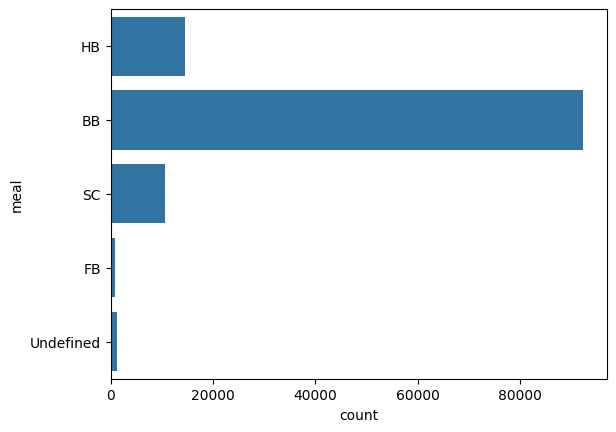

In [87]:
print(hotels_data_v2['meal'].value_counts())
sns.countplot(hotels_data_v2['meal'])

<h3>It is a categorical variable. So we will have to fill it with mode. But Instead of doind that I am going to fill it with random values
of HB:BB:SC in 1:9:1 ratio.

In [88]:
replacement_list = ['HB', 'BB', 'SC']
replacement_ratio = [1, 9, 1]
replacement_probabilities = [r / sum(replacement_ratio) for r in replacement_ratio]

# Replace 'Undefined' with random choices based on the ratio
hotels_data_v2['meal'] = hotels_data_v2['meal'].apply(
    lambda x: np.random.choice(replacement_list, p=replacement_probabilities) if x == 'Undefined' else x
)

meal
BB    93241
HB    14567
SC    10755
FB      798
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='meal'>

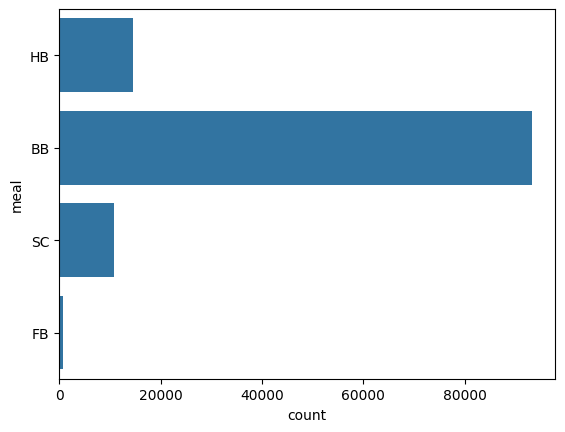

In [90]:
print(hotels_data_v2['meal'].value_counts())
sns.countplot(hotels_data_v2['meal'])

Here we can see that the data shape hasn't changed. So we are good